
## Fashion MNIST Dataset

Context:

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Labels:
Each training and test example is assigned to one of the following labels:

T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot
TL/DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
train = pd.read_csv("C:/Users/Deepthi/Desktop/srikar/fashion-mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [4]:
train.info

<bound method DataFrame.info of        label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       

In [5]:
train.shape

(60000, 785)

In [6]:
train.corr()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,1.000000,-0.000674,0.002944,-0.010439,-0.007111,-0.004632,-0.011045,-0.036765,-0.085211,-0.161552,...,-0.362614,-0.258380,-0.183131,-0.090568,-0.077340,-0.066936,-0.018038,0.045598,0.059960,0.021772
pixel1,-0.000674,1.000000,0.297899,0.067550,0.046608,0.026630,0.026172,0.012095,0.012218,0.009637,...,-0.000642,0.004625,0.004605,0.000969,-0.002306,-0.002441,-0.000108,0.008765,0.026389,0.041582
pixel2,0.002944,0.297899,1.000000,0.575029,0.138710,0.054354,0.033185,0.022763,0.017127,0.016809,...,0.000492,0.004857,0.006811,0.002083,-0.004431,-0.002342,0.004273,0.014218,0.021297,0.022162
pixel3,-0.010439,0.067550,0.575029,1.000000,0.387466,0.118135,0.087300,0.060927,0.035920,0.029712,...,0.010131,0.016743,0.018358,0.006171,-0.003825,-0.001501,0.006860,0.013152,0.009946,0.015657
pixel4,-0.007111,0.046608,0.138710,0.387466,1.000000,0.573172,0.325684,0.242954,0.140955,0.085253,...,0.009684,0.018697,0.023373,0.016718,0.009681,0.010095,0.023942,0.012392,0.003075,0.008423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.066936,-0.002441,-0.002342,-0.001501,0.010095,0.021505,0.032305,0.027024,0.019414,0.024837,...,-0.074375,-0.009124,0.042812,0.336699,0.790103,1.000000,0.749528,0.349021,0.178599,0.073398
pixel781,-0.018038,-0.000108,0.004273,0.006860,0.023942,0.025974,0.038563,0.030464,0.026227,0.034158,...,-0.042349,0.008555,0.045394,0.130783,0.439260,0.749528,1.000000,0.645809,0.334519,0.133817
pixel782,0.045598,0.008765,0.014218,0.013152,0.012392,0.028863,0.044121,0.029457,0.022724,0.020953,...,-0.002807,0.034069,0.073942,0.092657,0.152471,0.349021,0.645809,1.000000,0.658962,0.225502
pixel783,0.059960,0.026389,0.021297,0.009946,0.003075,0.022941,0.030806,0.016126,0.005938,0.000074,...,0.001898,0.026530,0.054193,0.077633,0.101066,0.178599,0.334519,0.658962,1.000000,0.451929


In [7]:
x_train = train.drop('label',axis=1).values
y_train = train['label'].values

In [8]:
x_train.shape

(60000, 784)

In [9]:
y_train.shape

(60000,)

In [10]:
# standard scaling
x_train = x_train/255.0


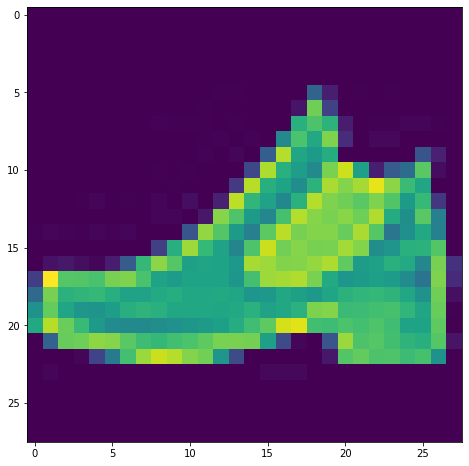

label: 9


In [11]:
def fashion(n):
    image = x_train[n]
    plt.figure(figsize=(14,8))
    plt.imshow(image.reshape(28,28))
    plt.show()
    print('label:', y_train[n])
fashion(1)

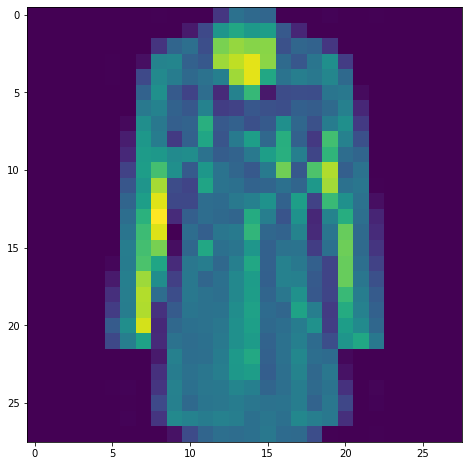

label: 4


In [12]:
fashion(6000)

In [13]:
test= pd.read_csv("C:/Users/Deepthi/Desktop/srikar/fashion-mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
x_test = test.iloc[0:, 1:]
y_test = test.iloc[0:, 0]

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [18]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
model.score(x_train,y_train)

1.0

In [24]:
model.score(x_test,y_test)

0.7258

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.7258

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[468,   1,  24,  42,   3,   0, 452,   0,  10,   0],
       [  6, 918,  10,  58,   1,   0,   7,   0,   0,   0],
       [  7,   0, 670,   5, 170,   0, 144,   0,   4,   0],
       [ 27,  23,  21, 849,  52,   0,  27,   0,   0,   1],
       [  1,   0, 384,  64, 499,   0,  50,   0,   2,   0],
       [  0,   0,   0,   1,   0, 846,   1,  85,  28,  39],
       [153,   1, 171,  24, 300,   0, 339,   0,  12,   0],
       [  0,   0,   0,   0,   0,  18,   0, 830,  17, 135],
       [  2,   1,   4,   4,   3,   1,  52,   1, 930,   2],
       [  0,   0,   0,   0,   0,   1,   2,  79,   9, 909]], dtype=int64)